# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [31]:
# Biblioteca que processa imagens

! pip install Pillow

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [33]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [34]:
!ls MNIST

processed  raw


In [35]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt') # Baixa o dataset de treinamento. Arquivo PT, são arquivos binários

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


<ipython-input-35-1f50e1a4cd5a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train, y_train = torch.load(dataset_dir + 'processed/training.pt') # Baixa o dataset de tr

### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [36]:
x_train = x_train.float()

x_train = x_train / 255. # Nomrmalização dos dados

if False: # False se quiser que o número de amostras seja completa 60000
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


Agora rodaremos com 100% das amostras

In [37]:
"""# Normalização
x_train = x_train.float() / 255.0

# Garantir que estamos utilizando o conjunto completo
n_samples_train = 60000
x_train = x_train[:n_samples_train]
y_train = y_train[:n_samples_train]

# Verificar os resultados
print("Amostras de treinamento:", x_train.size(0))
print("Dimensões dos dados das imagens:", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))"""

'# Normalização\nx_train = x_train.float() / 255.0\n\n# Garantir que estamos utilizando o conjunto completo\nn_samples_train = 60000\nx_train = x_train[:n_samples_train]\ny_train = y_train[:n_samples_train]\n\n# Verificar os resultados\nprint("Amostras de treinamento:", x_train.size(0))\nprint("Dimensões dos dados das imagens:", x_train.size())\nprint("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))'

### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

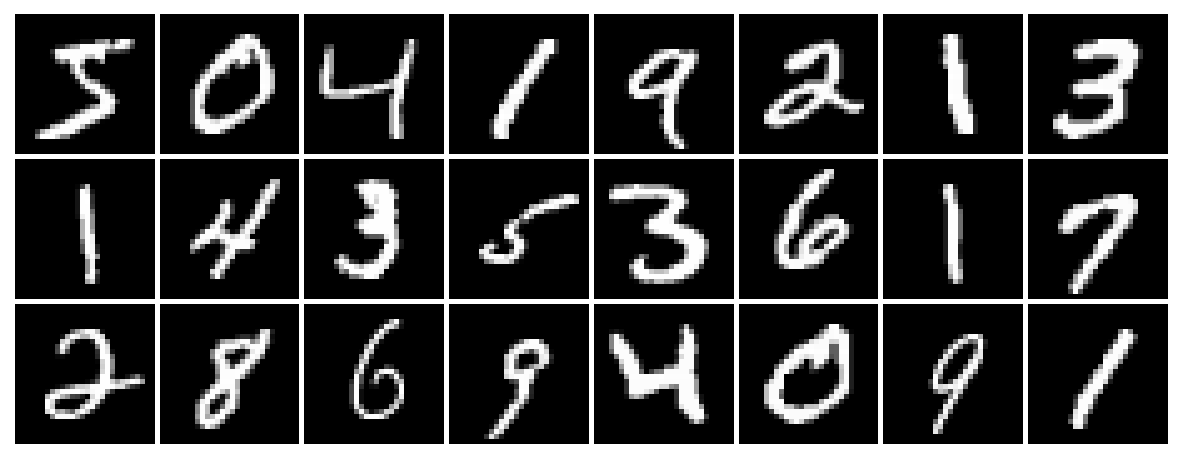

In [38]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


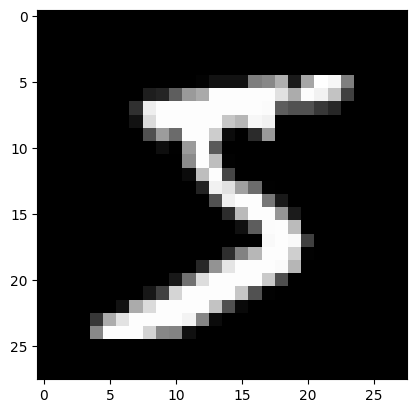

In [39]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [40]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [41]:
xin = x_train[:5].view(-1,28*28) # O view() transforma as imagens, que são uma matriz, em um array de uma linha (784 colunas)
score = model(Variable(xin))
score

tensor([[-0.0626, -0.0213,  0.0541, -0.1259, -0.1898,  0.1415, -0.1354,  0.0277,
         -0.1806,  0.1763],
        [-0.0303, -0.2064,  0.2106, -0.3118, -0.1711, -0.0838, -0.1134,  0.1699,
         -0.0275,  0.1752],
        [ 0.2508,  0.0015, -0.0425,  0.1668,  0.2390,  0.0817,  0.1996,  0.2647,
         -0.0785,  0.1303],
        [ 0.0120,  0.0228,  0.0376,  0.0391,  0.1069, -0.0475, -0.0760,  0.1074,
         -0.2373, -0.2630],
        [ 0.0594,  0.1507,  0.0643, -0.0532, -0.0581,  0.0366, -0.0647,  0.1918,
         -0.0559, -0.2860]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [42]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [43]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-th6xhk2e
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-th6xhk2e
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done


In [44]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.2953, grad_fn=<NllLossBackward0>)

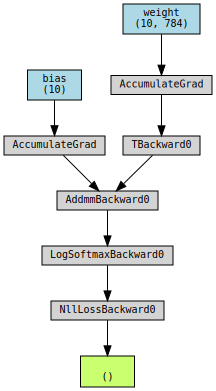

In [45]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [46]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28)) # O view() transforma as imagens, que são uma matriz, em um array de uma linha (784 colunas)
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [47]:
print('Final loss:', loss.item())

Final loss: 0.3932572603225708


### Visualizando gráfico de perda durante o treinamento

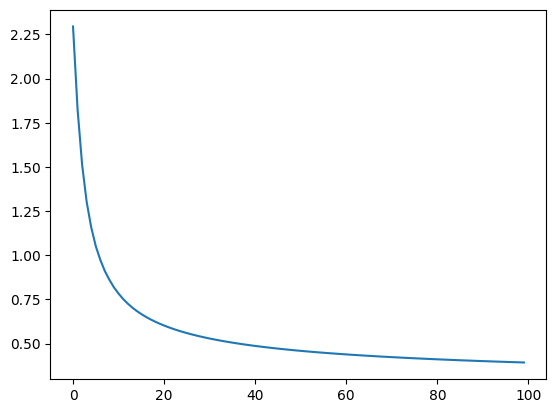

In [48]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [49]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.8945666666666666


### Matriz de confusão com dados de treinamento e teste

In [50]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,5671,0,54,35,11,103,49,49,34,52
1,0,6511,76,44,36,67,29,95,177,39
2,24,33,5107,158,41,47,69,101,83,39
3,23,30,97,5288,4,238,5,23,182,101
4,12,5,131,7,5311,86,49,83,28,228
5,47,51,18,258,7,4409,84,11,181,42
6,59,10,133,44,78,114,5571,3,45,5
7,7,15,128,78,14,30,2,5660,38,204
8,72,77,173,139,45,237,58,20,4966,59


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


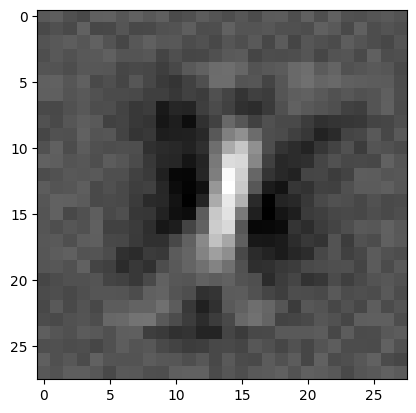

In [51]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[1, :].numpy().reshape((28,28)),cmap = 'gray') # O reshape restaura as imagens, que tinham sido transformadas em um array, para uma matriz novamente
plt.show()

### Visualizando os pesos de todas as classes

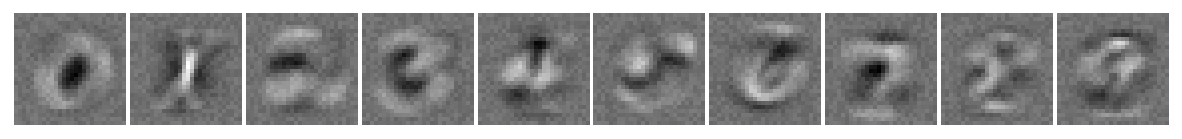

In [52]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época 1/150, Perda: 0.278689, Acurácia: 0.9227
weights: torch.Size([10, 784])


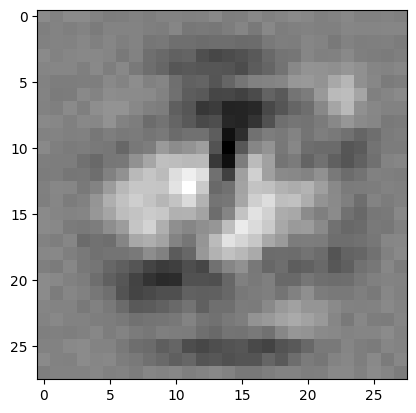

Época 2/150, Perda: 0.278685, Acurácia: 0.9227
weights: torch.Size([10, 784])


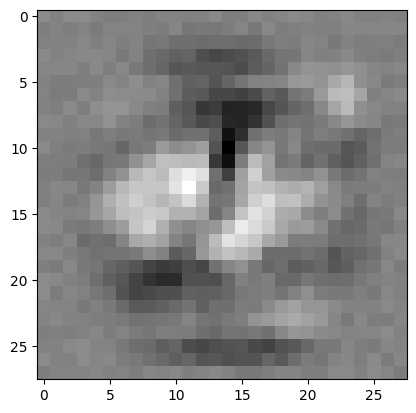

Época 3/150, Perda: 0.278682, Acurácia: 0.9227
weights: torch.Size([10, 784])


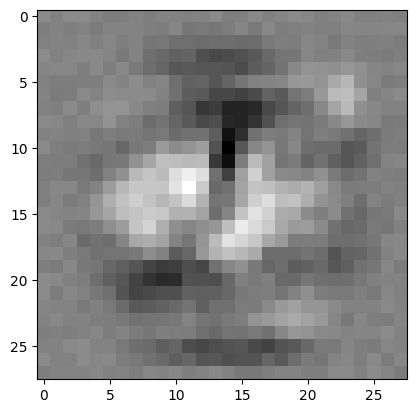

Época 4/150, Perda: 0.278678, Acurácia: 0.9227
weights: torch.Size([10, 784])


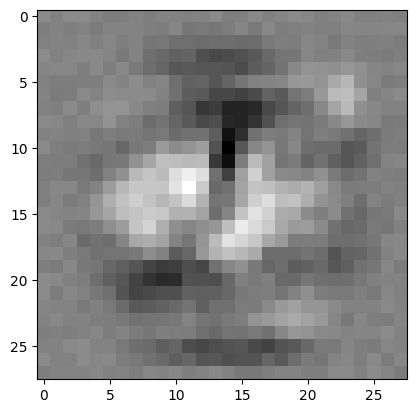

Época 5/150, Perda: 0.278675, Acurácia: 0.9227
weights: torch.Size([10, 784])


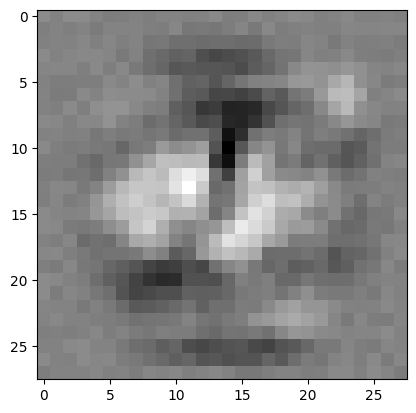

Época 6/150, Perda: 0.278671, Acurácia: 0.9227
weights: torch.Size([10, 784])


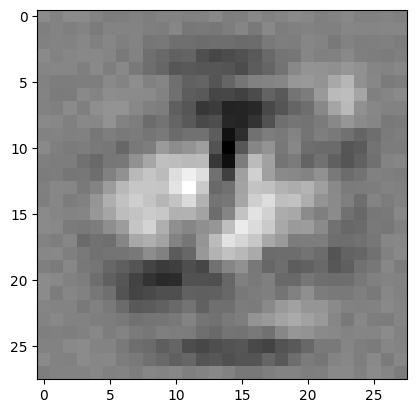

Época 7/150, Perda: 0.278668, Acurácia: 0.9227
weights: torch.Size([10, 784])


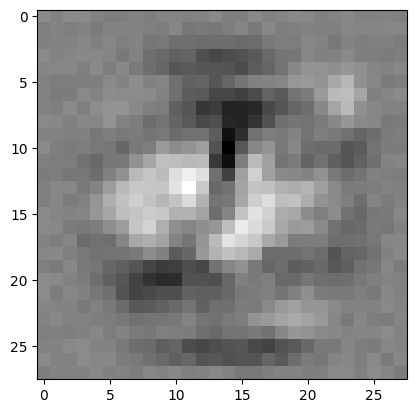

Época 8/150, Perda: 0.278664, Acurácia: 0.9227
weights: torch.Size([10, 784])


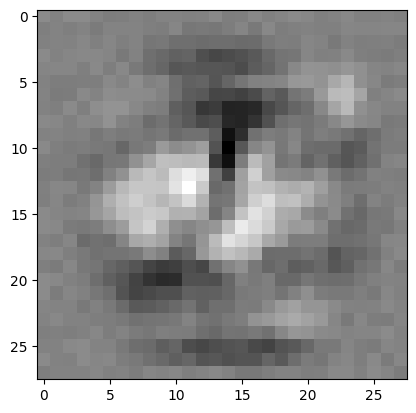

Época 9/150, Perda: 0.278661, Acurácia: 0.9227
weights: torch.Size([10, 784])


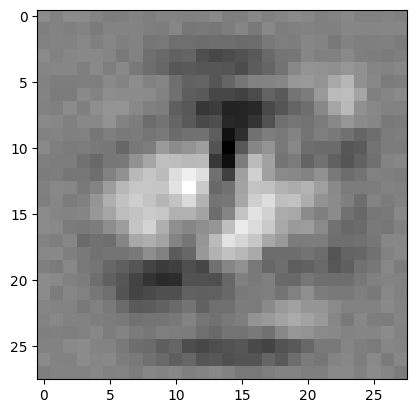

Época 10/150, Perda: 0.278657, Acurácia: 0.9227
weights: torch.Size([10, 784])


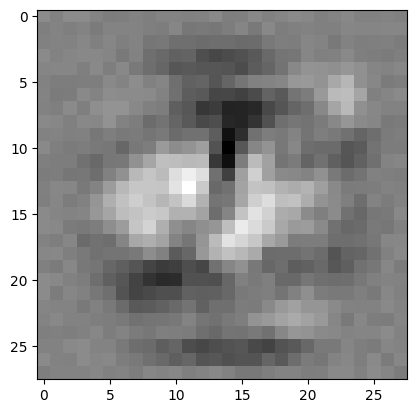

Época 11/150, Perda: 0.278654, Acurácia: 0.9227
weights: torch.Size([10, 784])


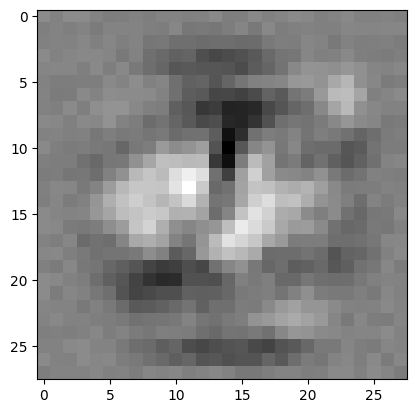

Época 12/150, Perda: 0.278650, Acurácia: 0.9227
weights: torch.Size([10, 784])


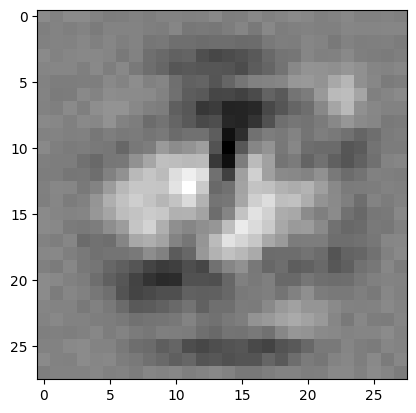

Época 13/150, Perda: 0.278647, Acurácia: 0.9227
weights: torch.Size([10, 784])


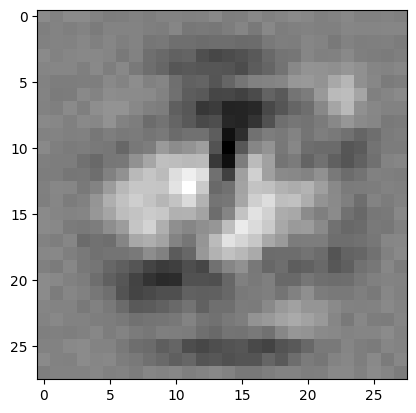

Época 14/150, Perda: 0.278643, Acurácia: 0.9227
weights: torch.Size([10, 784])


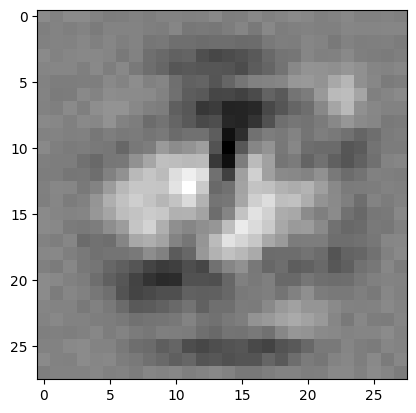

Época 15/150, Perda: 0.278639, Acurácia: 0.9227
weights: torch.Size([10, 784])


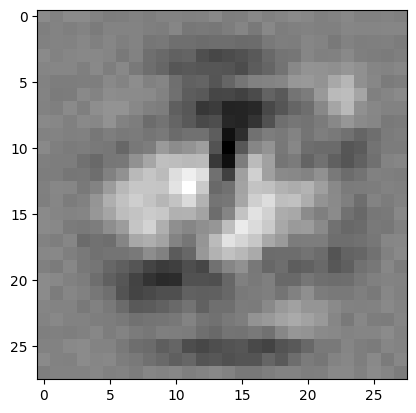

Época 16/150, Perda: 0.278636, Acurácia: 0.9227
weights: torch.Size([10, 784])


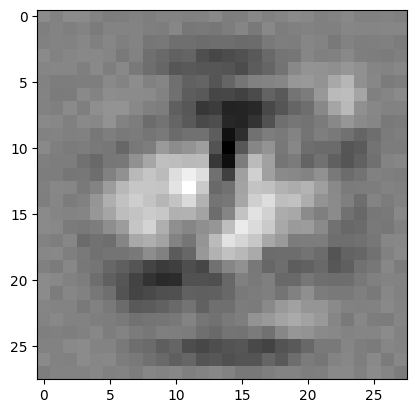

Época 17/150, Perda: 0.278632, Acurácia: 0.9227
weights: torch.Size([10, 784])


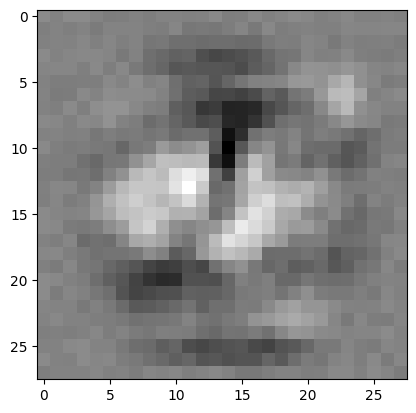

Época 18/150, Perda: 0.278629, Acurácia: 0.9227
weights: torch.Size([10, 784])


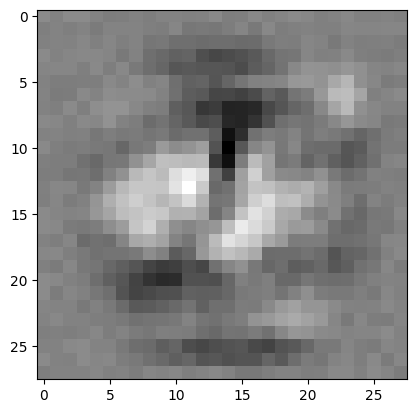

Época 19/150, Perda: 0.278625, Acurácia: 0.9227
weights: torch.Size([10, 784])


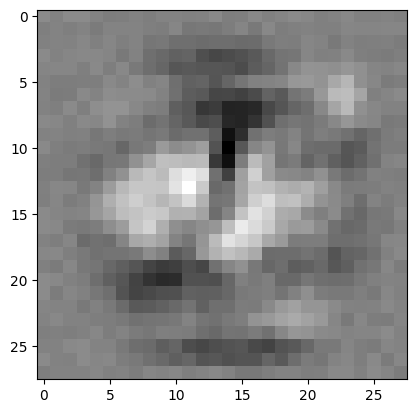

Época 20/150, Perda: 0.278622, Acurácia: 0.9227
weights: torch.Size([10, 784])


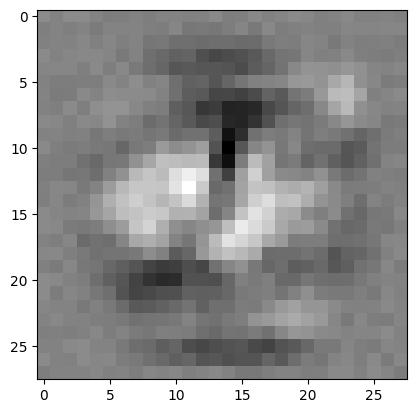

Época 21/150, Perda: 0.278618, Acurácia: 0.9227
weights: torch.Size([10, 784])


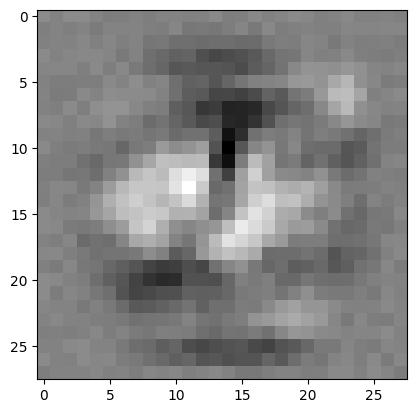

Época 22/150, Perda: 0.278615, Acurácia: 0.9227
weights: torch.Size([10, 784])


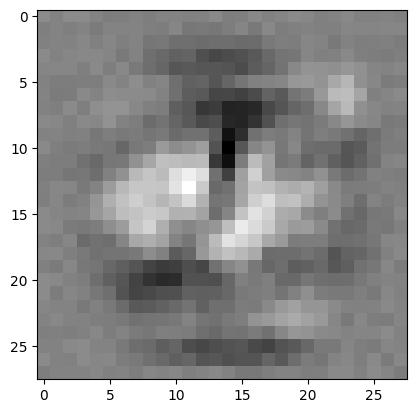

Época 23/150, Perda: 0.278611, Acurácia: 0.9227
weights: torch.Size([10, 784])


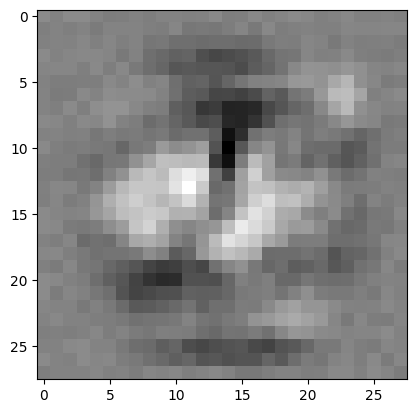

Época 24/150, Perda: 0.278608, Acurácia: 0.9227
weights: torch.Size([10, 784])


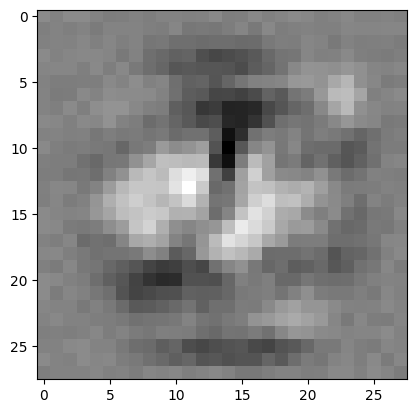

Época 25/150, Perda: 0.278604, Acurácia: 0.9227
weights: torch.Size([10, 784])


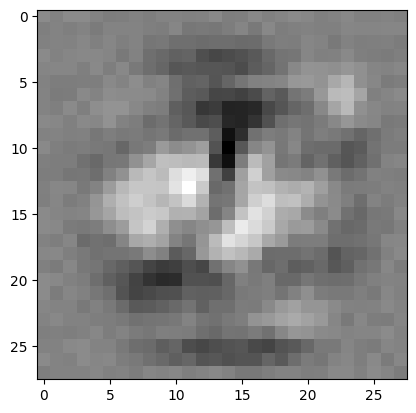

Época 26/150, Perda: 0.278601, Acurácia: 0.9227
weights: torch.Size([10, 784])


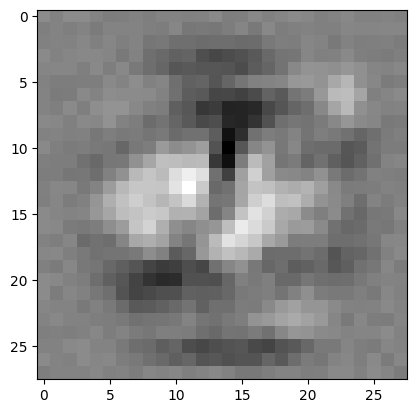

Época 27/150, Perda: 0.278597, Acurácia: 0.9227
weights: torch.Size([10, 784])


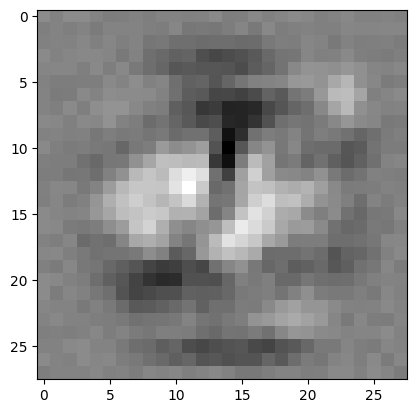

Época 28/150, Perda: 0.278594, Acurácia: 0.9227
weights: torch.Size([10, 784])


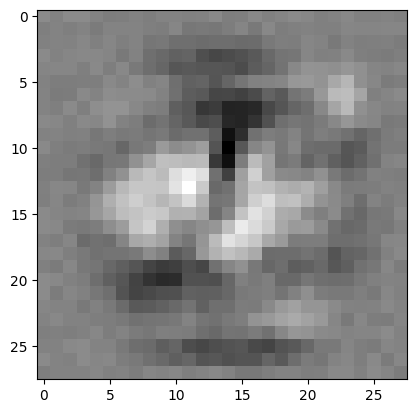

Época 29/150, Perda: 0.278590, Acurácia: 0.9227
weights: torch.Size([10, 784])


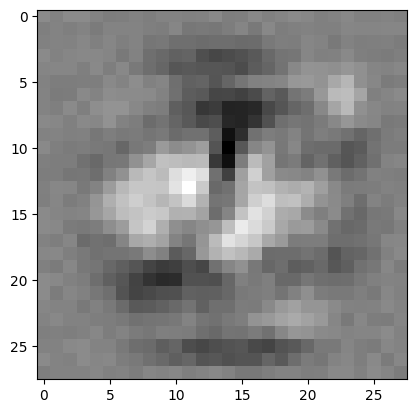

Época 30/150, Perda: 0.278586, Acurácia: 0.9228
weights: torch.Size([10, 784])


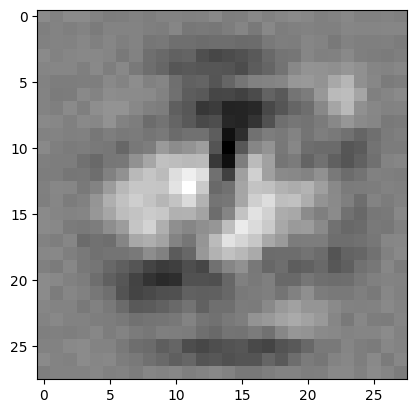

Época 31/150, Perda: 0.278583, Acurácia: 0.9228
weights: torch.Size([10, 784])


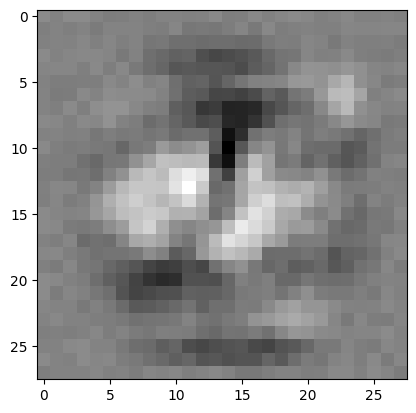

Época 32/150, Perda: 0.278579, Acurácia: 0.9228
weights: torch.Size([10, 784])


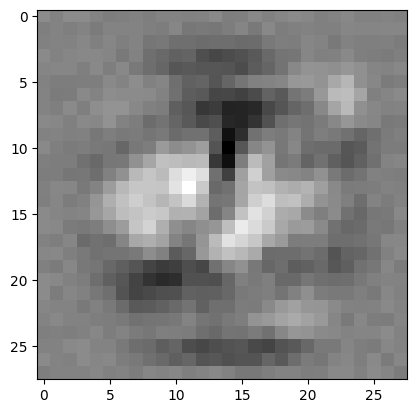

Época 33/150, Perda: 0.278576, Acurácia: 0.9228
weights: torch.Size([10, 784])


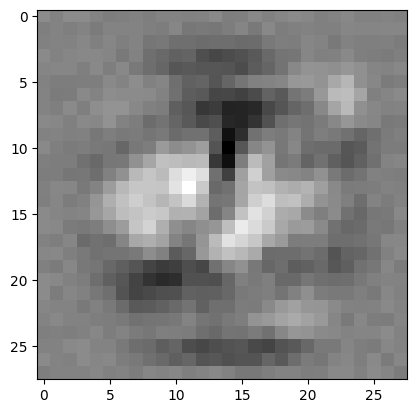

Época 34/150, Perda: 0.278572, Acurácia: 0.9228
weights: torch.Size([10, 784])


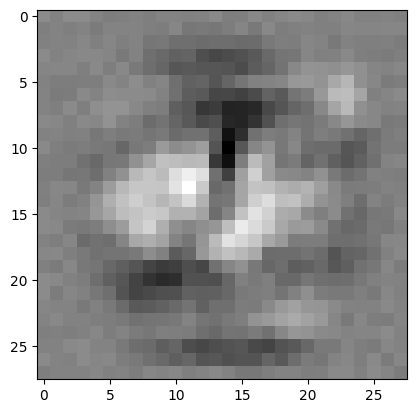

Época 35/150, Perda: 0.278569, Acurácia: 0.9228
weights: torch.Size([10, 784])


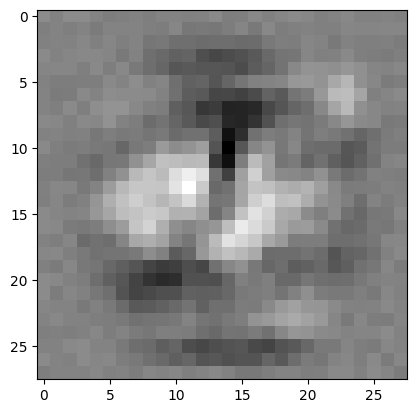

Época 36/150, Perda: 0.278565, Acurácia: 0.9228
weights: torch.Size([10, 784])


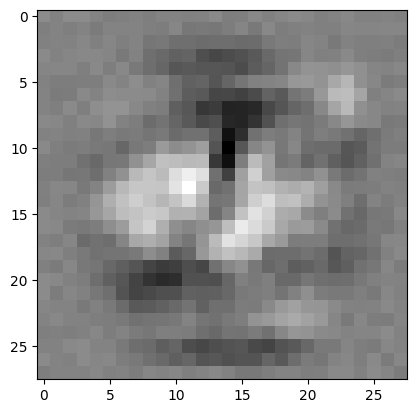

Época 37/150, Perda: 0.278562, Acurácia: 0.9228
weights: torch.Size([10, 784])


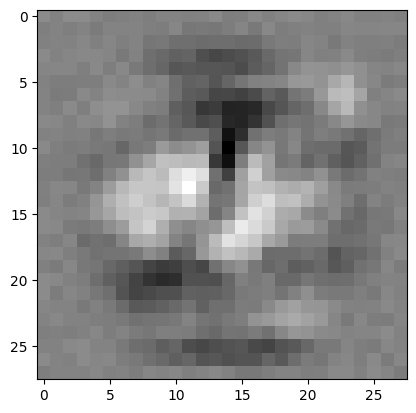

Época 38/150, Perda: 0.278558, Acurácia: 0.9228
weights: torch.Size([10, 784])


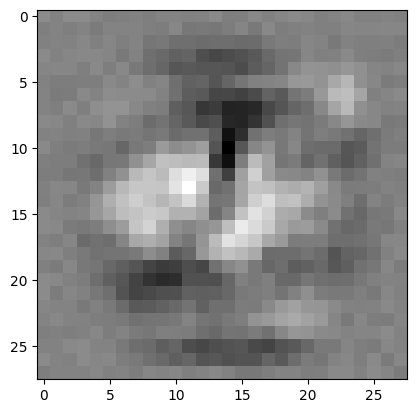

Época 39/150, Perda: 0.278555, Acurácia: 0.9228
weights: torch.Size([10, 784])


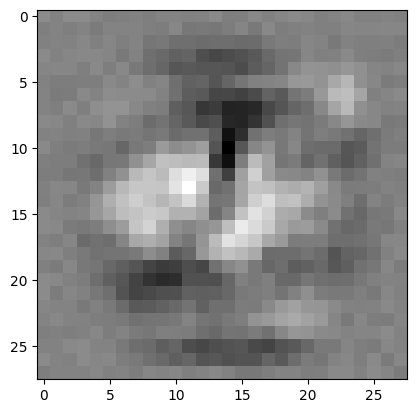

Época 40/150, Perda: 0.278551, Acurácia: 0.9228
weights: torch.Size([10, 784])


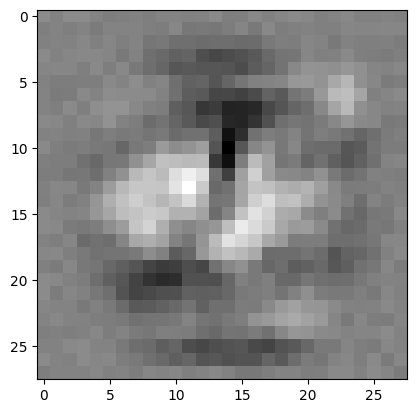

Época 41/150, Perda: 0.278548, Acurácia: 0.9228
weights: torch.Size([10, 784])


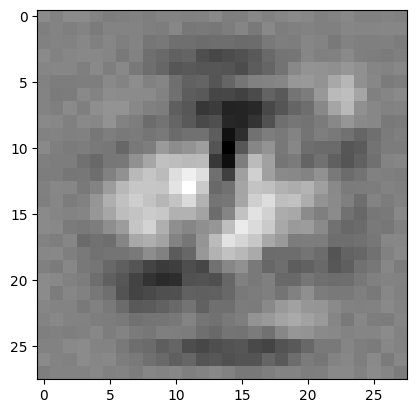

Época 42/150, Perda: 0.278544, Acurácia: 0.9228
weights: torch.Size([10, 784])


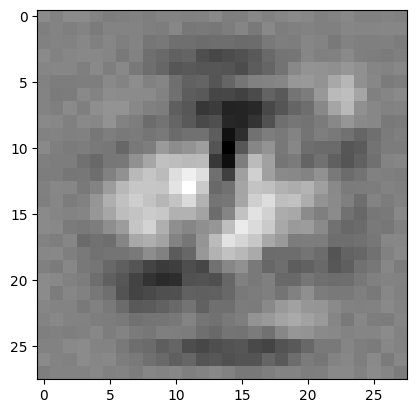

Época 43/150, Perda: 0.278541, Acurácia: 0.9228
weights: torch.Size([10, 784])


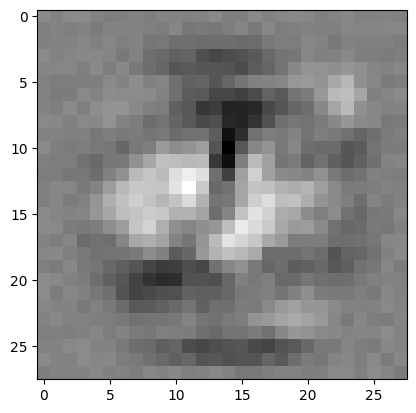

Época 44/150, Perda: 0.278537, Acurácia: 0.9228
weights: torch.Size([10, 784])


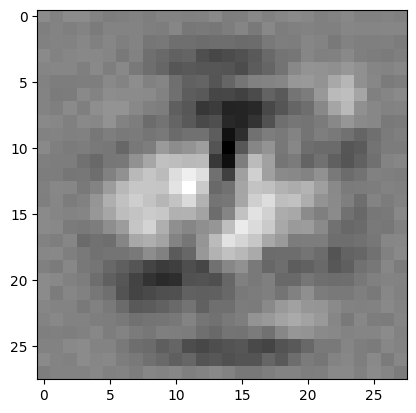

Época 45/150, Perda: 0.278534, Acurácia: 0.9228
weights: torch.Size([10, 784])


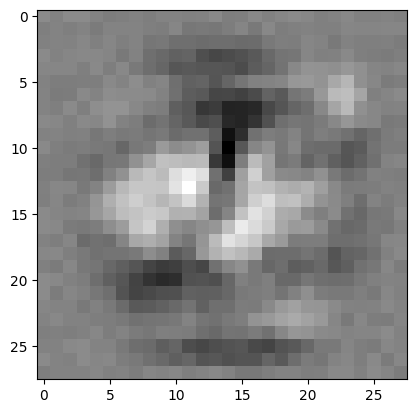

Época 46/150, Perda: 0.278530, Acurácia: 0.9228
weights: torch.Size([10, 784])


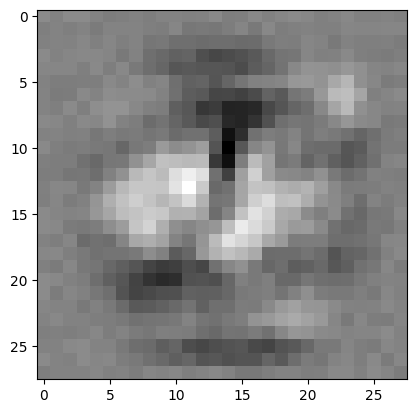

Época 47/150, Perda: 0.278527, Acurácia: 0.9228
weights: torch.Size([10, 784])


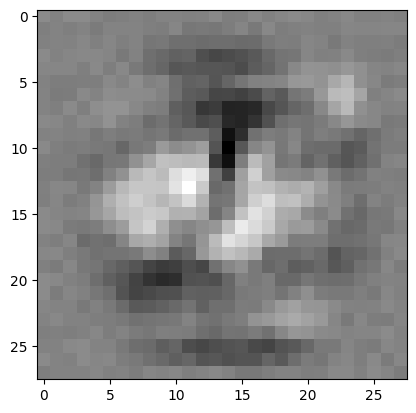

Época 48/150, Perda: 0.278523, Acurácia: 0.9228
weights: torch.Size([10, 784])


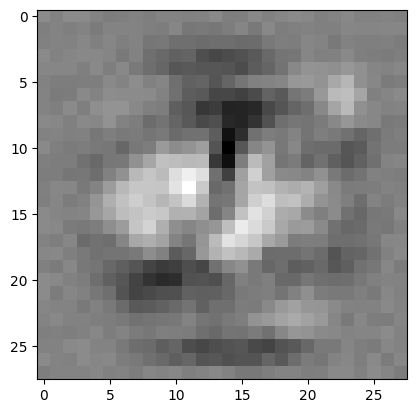

Época 49/150, Perda: 0.278520, Acurácia: 0.9228
weights: torch.Size([10, 784])


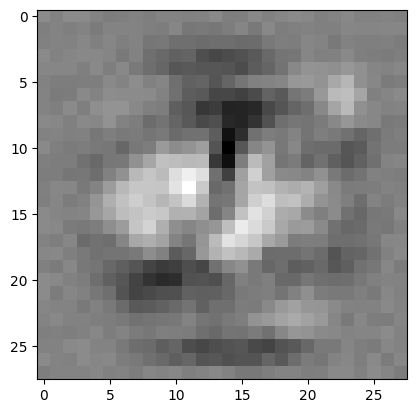

Época 50/150, Perda: 0.278516, Acurácia: 0.9228
weights: torch.Size([10, 784])


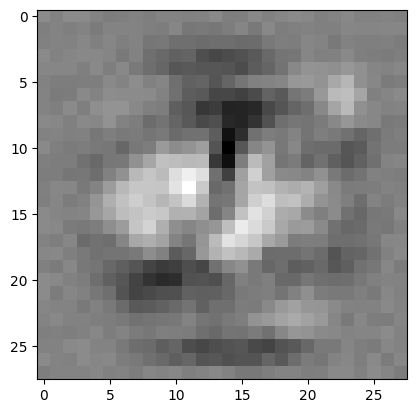

Época 51/150, Perda: 0.278513, Acurácia: 0.9228
weights: torch.Size([10, 784])


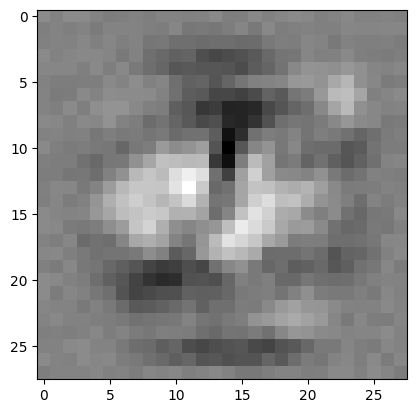

Época 52/150, Perda: 0.278509, Acurácia: 0.9228
weights: torch.Size([10, 784])


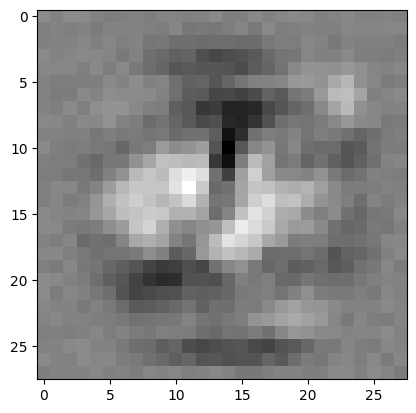

Época 53/150, Perda: 0.278506, Acurácia: 0.9228
weights: torch.Size([10, 784])


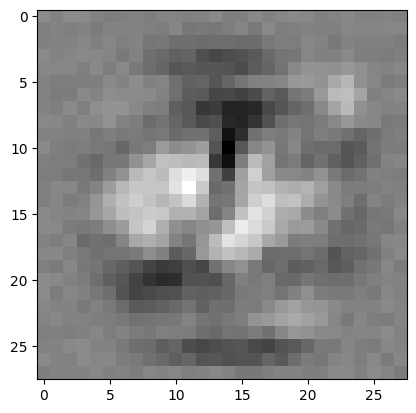

Época 54/150, Perda: 0.278502, Acurácia: 0.9228
weights: torch.Size([10, 784])


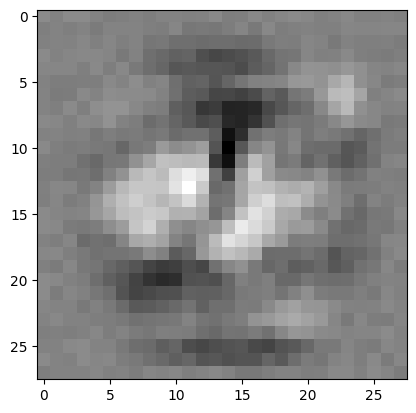

Época 55/150, Perda: 0.278499, Acurácia: 0.9228
weights: torch.Size([10, 784])


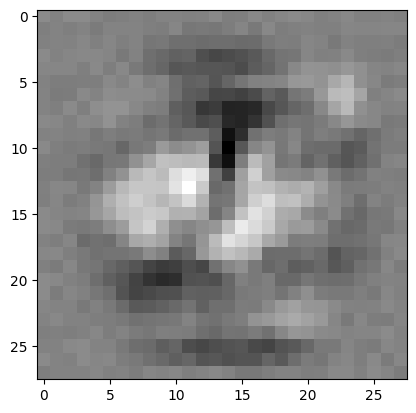

Época 56/150, Perda: 0.278495, Acurácia: 0.9228
weights: torch.Size([10, 784])


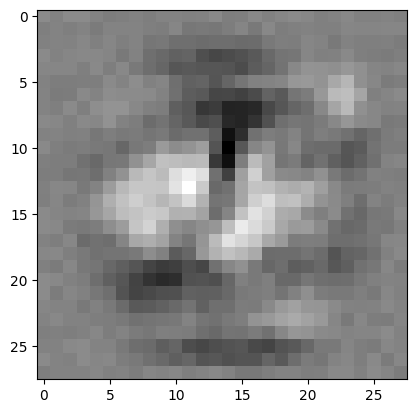

Época 57/150, Perda: 0.278492, Acurácia: 0.9228
weights: torch.Size([10, 784])


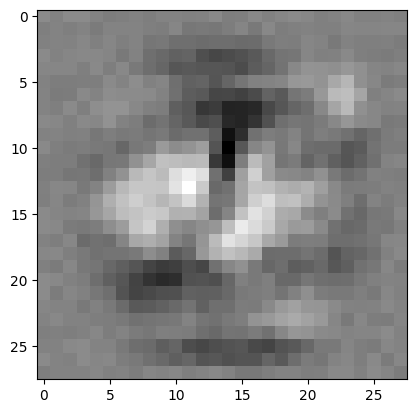

Época 58/150, Perda: 0.278488, Acurácia: 0.9228
weights: torch.Size([10, 784])


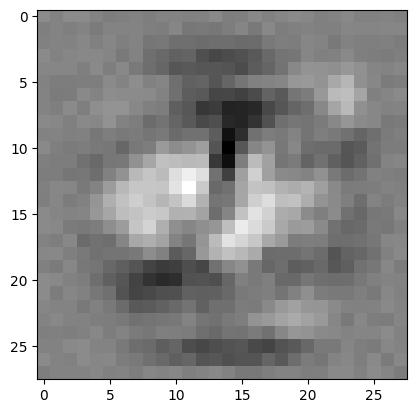

Época 59/150, Perda: 0.278485, Acurácia: 0.9228
weights: torch.Size([10, 784])


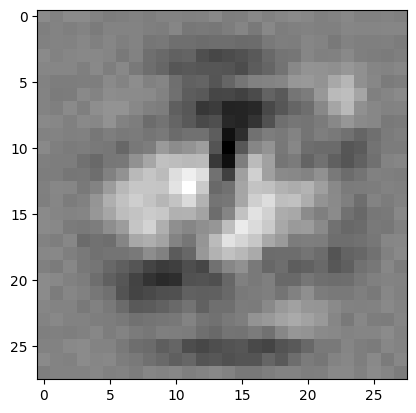

Época 60/150, Perda: 0.278481, Acurácia: 0.9228
weights: torch.Size([10, 784])


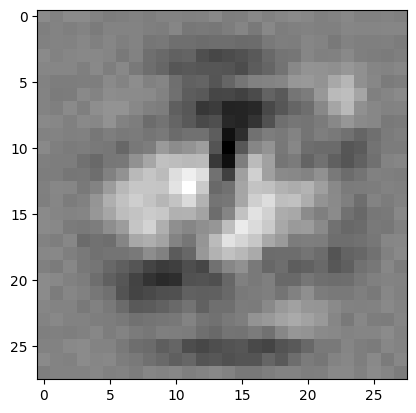

Época 61/150, Perda: 0.278478, Acurácia: 0.9228
weights: torch.Size([10, 784])


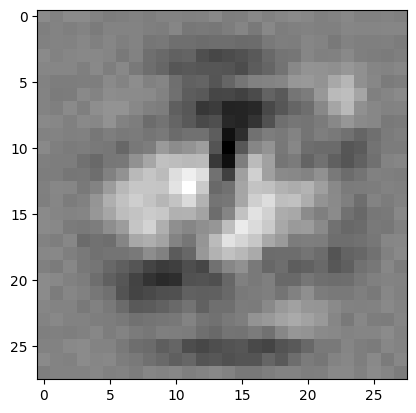

Época 62/150, Perda: 0.278474, Acurácia: 0.9228
weights: torch.Size([10, 784])


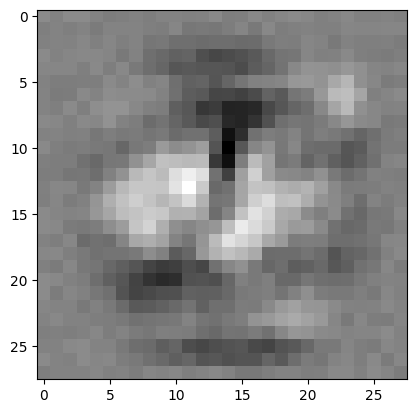

Época 63/150, Perda: 0.278471, Acurácia: 0.9228
weights: torch.Size([10, 784])


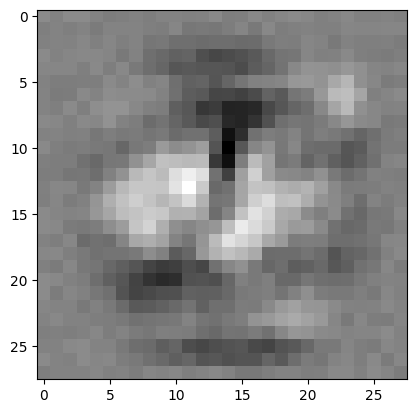

Época 64/150, Perda: 0.278467, Acurácia: 0.9229
weights: torch.Size([10, 784])


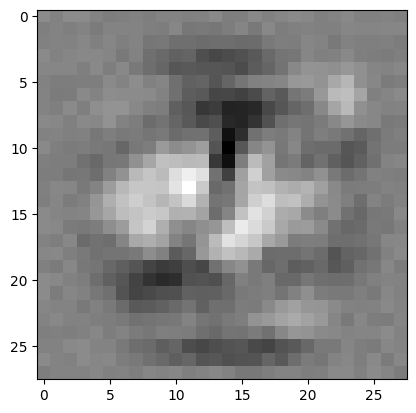

Época 65/150, Perda: 0.278464, Acurácia: 0.9229
weights: torch.Size([10, 784])


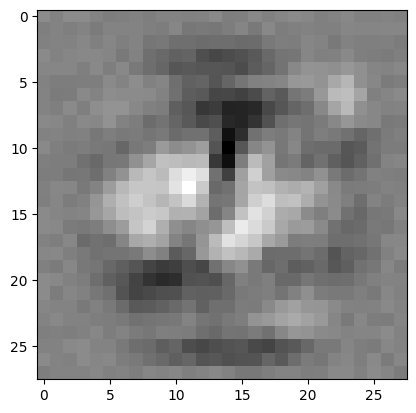

Época 66/150, Perda: 0.278460, Acurácia: 0.9229
weights: torch.Size([10, 784])


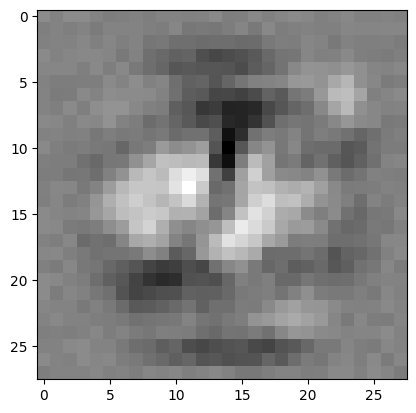

Época 67/150, Perda: 0.278457, Acurácia: 0.9228
weights: torch.Size([10, 784])


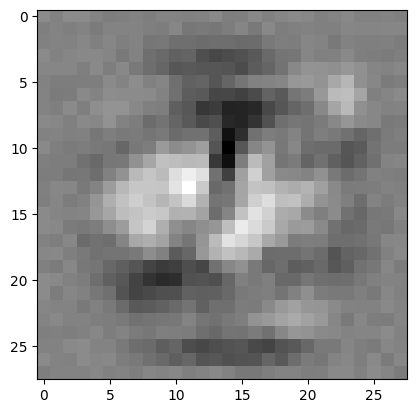

Época 68/150, Perda: 0.278453, Acurácia: 0.9228
weights: torch.Size([10, 784])


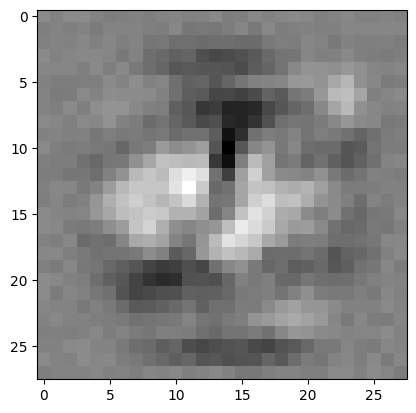

Época 69/150, Perda: 0.278450, Acurácia: 0.9228
weights: torch.Size([10, 784])


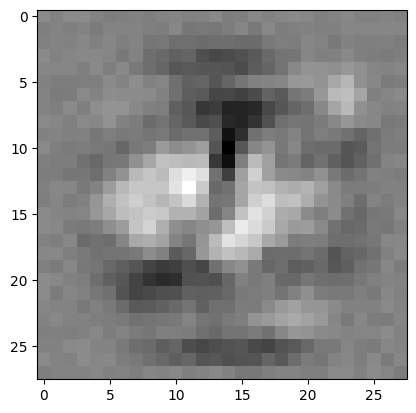

Época 70/150, Perda: 0.278446, Acurácia: 0.9228
weights: torch.Size([10, 784])


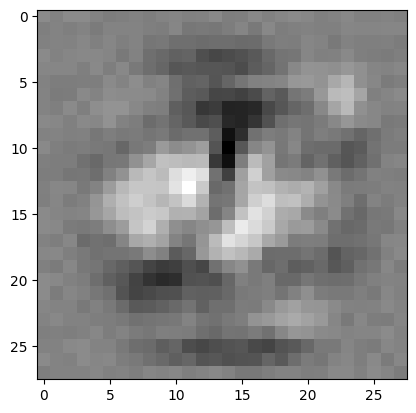

Época 71/150, Perda: 0.278443, Acurácia: 0.9228
weights: torch.Size([10, 784])


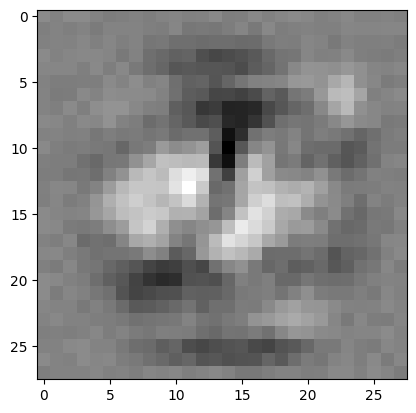

Época 72/150, Perda: 0.278439, Acurácia: 0.9228
weights: torch.Size([10, 784])


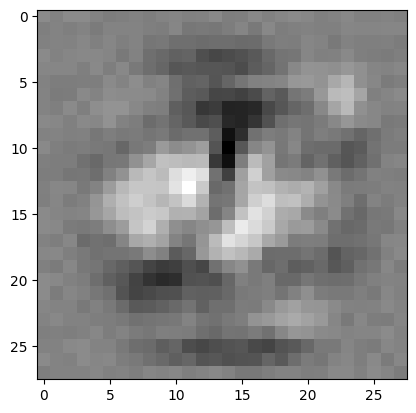

Época 73/150, Perda: 0.278436, Acurácia: 0.9228
weights: torch.Size([10, 784])


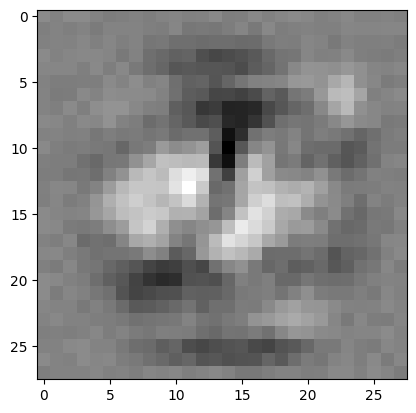

Época 74/150, Perda: 0.278432, Acurácia: 0.9228
weights: torch.Size([10, 784])


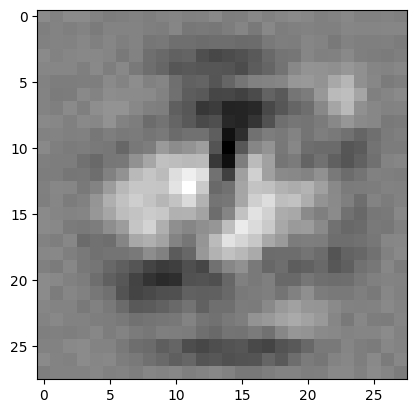

Época 75/150, Perda: 0.278429, Acurácia: 0.9228
weights: torch.Size([10, 784])


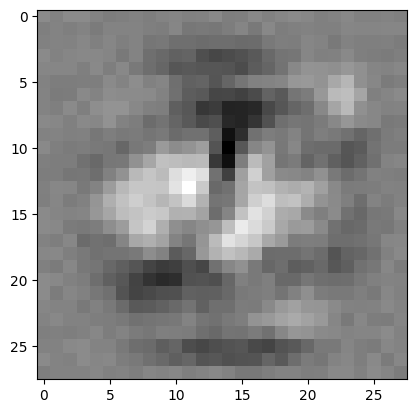

Época 76/150, Perda: 0.278425, Acurácia: 0.9228
weights: torch.Size([10, 784])


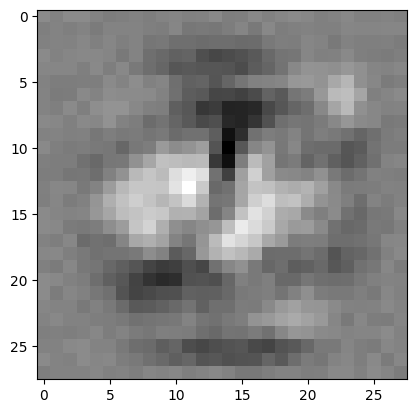

Época 77/150, Perda: 0.278422, Acurácia: 0.9228
weights: torch.Size([10, 784])


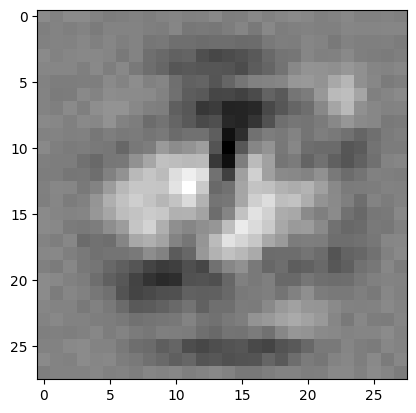

Época 78/150, Perda: 0.278418, Acurácia: 0.9228
weights: torch.Size([10, 784])


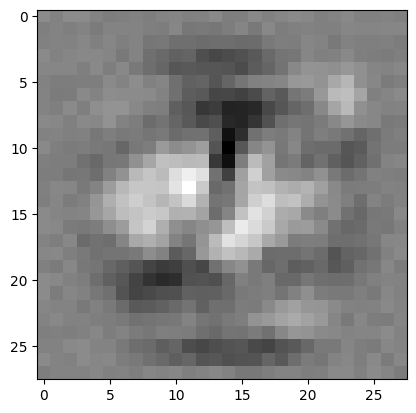

Época 79/150, Perda: 0.278415, Acurácia: 0.9228
weights: torch.Size([10, 784])


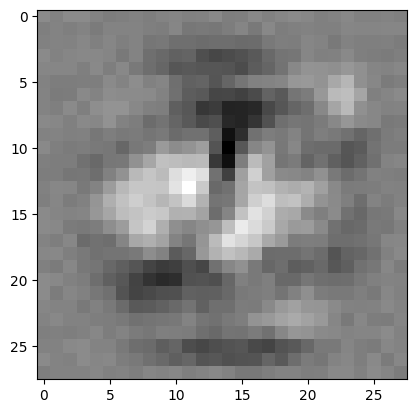

Época 80/150, Perda: 0.278411, Acurácia: 0.9228
weights: torch.Size([10, 784])


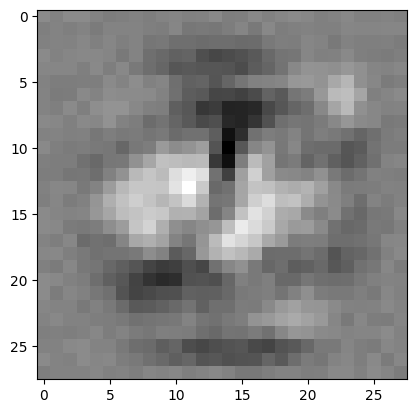

Época 81/150, Perda: 0.278408, Acurácia: 0.9228
weights: torch.Size([10, 784])


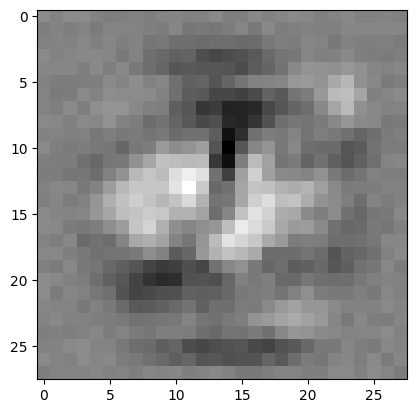

Época 82/150, Perda: 0.278404, Acurácia: 0.9228
weights: torch.Size([10, 784])


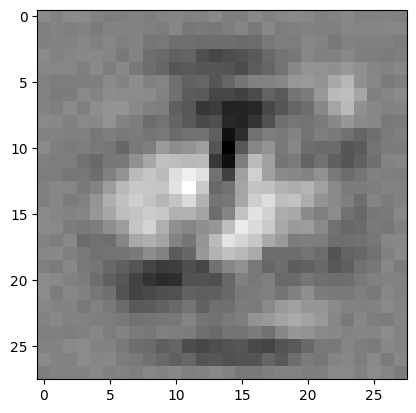

Época 83/150, Perda: 0.278401, Acurácia: 0.9229
weights: torch.Size([10, 784])


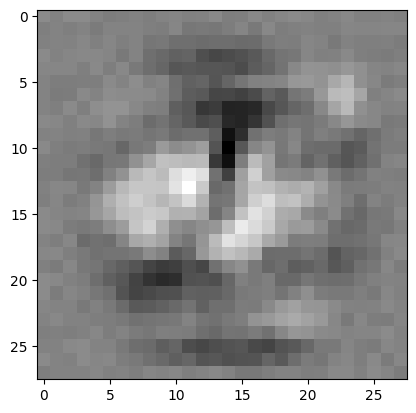

Época 84/150, Perda: 0.278397, Acurácia: 0.9229
weights: torch.Size([10, 784])


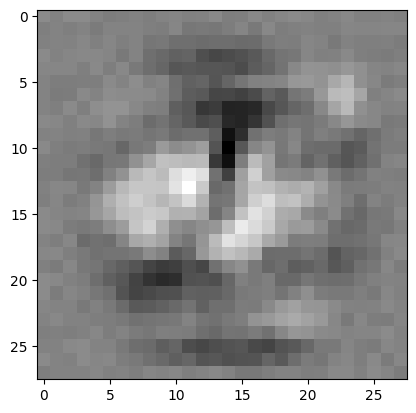

Época 85/150, Perda: 0.278394, Acurácia: 0.9229
weights: torch.Size([10, 784])


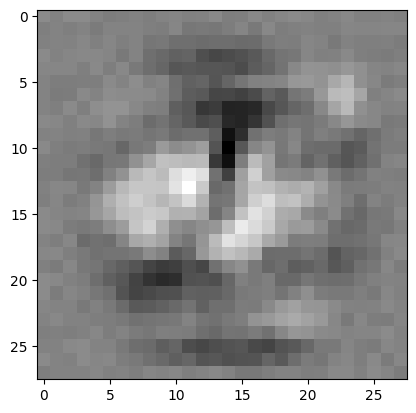

Época 86/150, Perda: 0.278390, Acurácia: 0.9229
weights: torch.Size([10, 784])


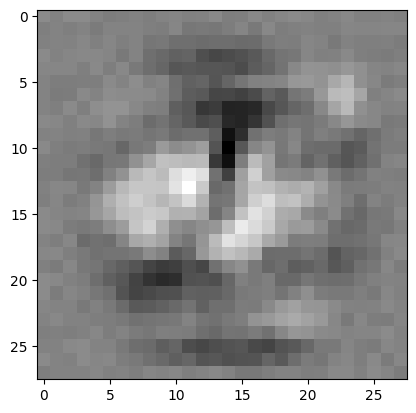

Época 87/150, Perda: 0.278387, Acurácia: 0.9229
weights: torch.Size([10, 784])


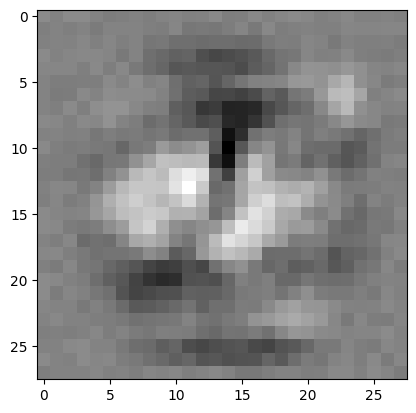

Época 88/150, Perda: 0.278383, Acurácia: 0.9229
weights: torch.Size([10, 784])


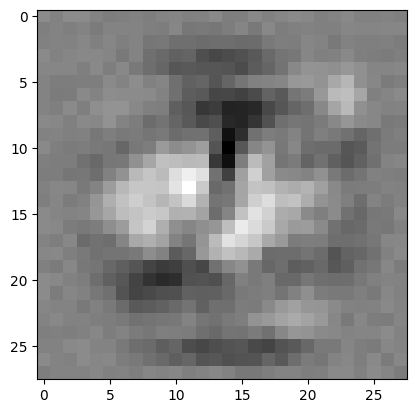

Época 89/150, Perda: 0.278380, Acurácia: 0.9229
weights: torch.Size([10, 784])


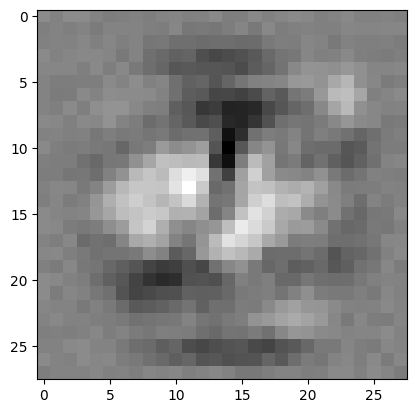

Época 90/150, Perda: 0.278376, Acurácia: 0.9229
weights: torch.Size([10, 784])


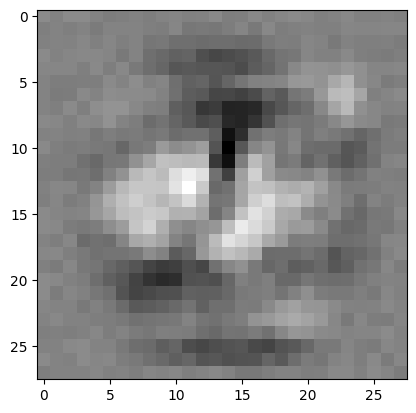

Época 91/150, Perda: 0.278373, Acurácia: 0.9229
weights: torch.Size([10, 784])


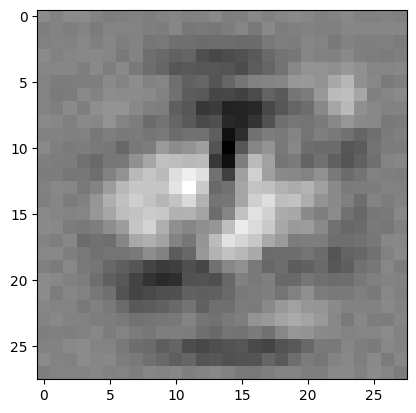

Época 92/150, Perda: 0.278369, Acurácia: 0.9229
weights: torch.Size([10, 784])


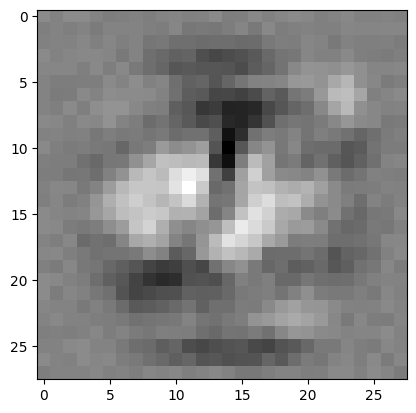

Época 93/150, Perda: 0.278366, Acurácia: 0.9229
weights: torch.Size([10, 784])


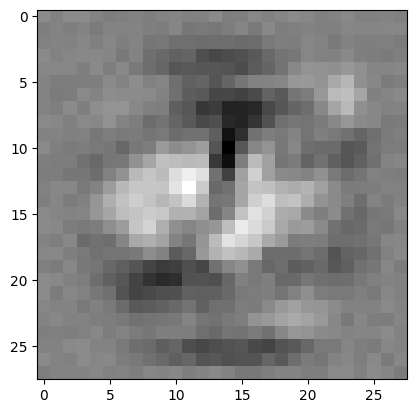

Época 94/150, Perda: 0.278362, Acurácia: 0.9229
weights: torch.Size([10, 784])


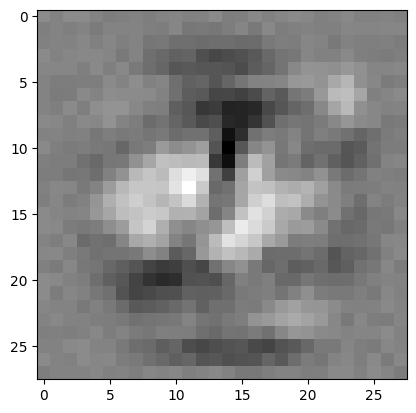

Época 95/150, Perda: 0.278359, Acurácia: 0.9229
weights: torch.Size([10, 784])


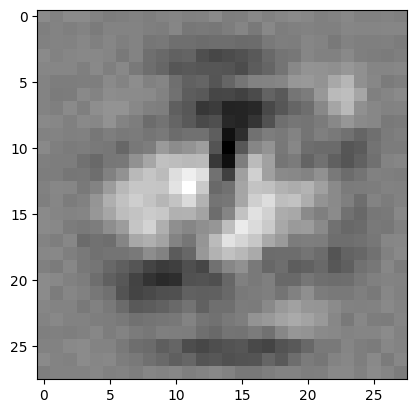

Época 96/150, Perda: 0.278355, Acurácia: 0.9229
weights: torch.Size([10, 784])


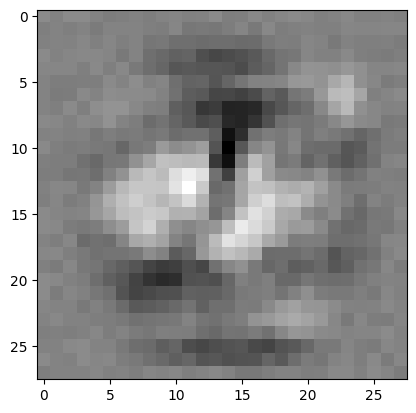

Época 97/150, Perda: 0.278352, Acurácia: 0.9229
weights: torch.Size([10, 784])


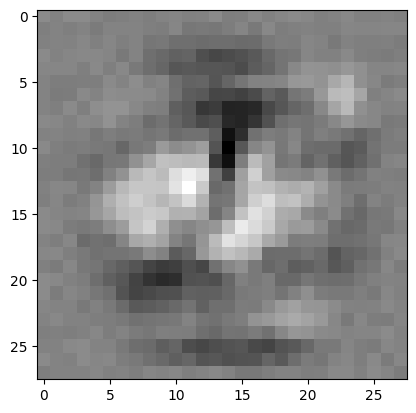

Época 98/150, Perda: 0.278348, Acurácia: 0.9229
weights: torch.Size([10, 784])


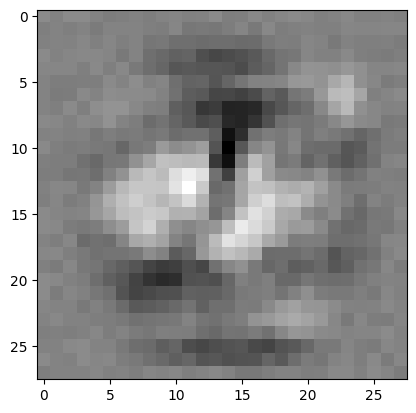

Época 99/150, Perda: 0.278345, Acurácia: 0.9229
weights: torch.Size([10, 784])


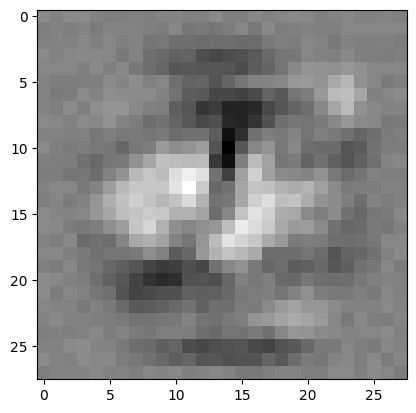

Época 100/150, Perda: 0.278341, Acurácia: 0.9229
weights: torch.Size([10, 784])


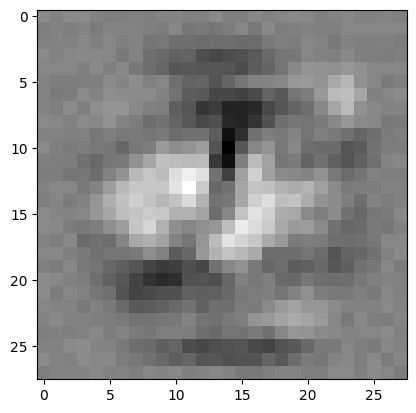

Época 101/150, Perda: 0.278338, Acurácia: 0.9229
weights: torch.Size([10, 784])


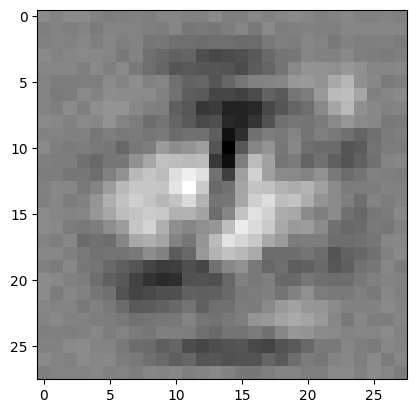

Época 102/150, Perda: 0.278334, Acurácia: 0.9229
weights: torch.Size([10, 784])


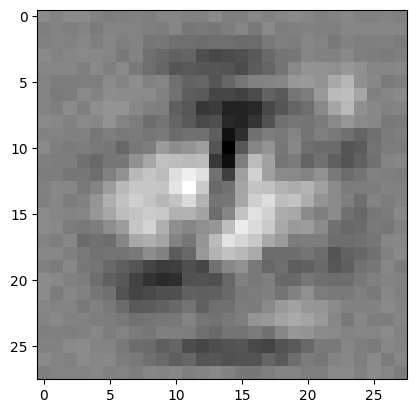

Época 103/150, Perda: 0.278331, Acurácia: 0.9229
weights: torch.Size([10, 784])


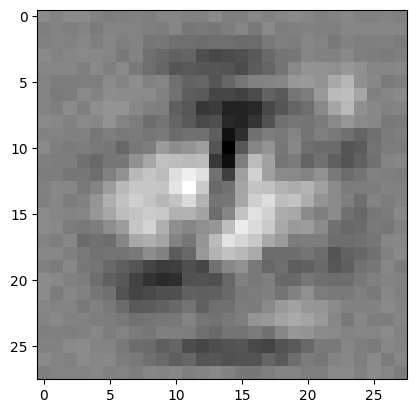

Época 104/150, Perda: 0.278327, Acurácia: 0.9229
weights: torch.Size([10, 784])


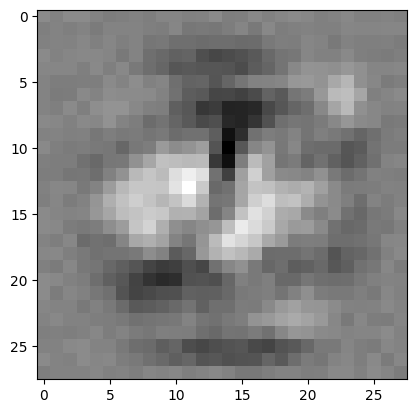

Época 105/150, Perda: 0.278324, Acurácia: 0.9229
weights: torch.Size([10, 784])


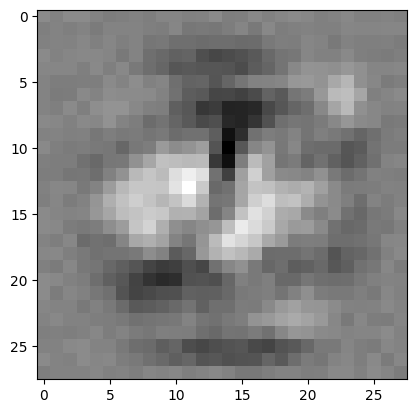

Época 106/150, Perda: 0.278321, Acurácia: 0.9229
weights: torch.Size([10, 784])


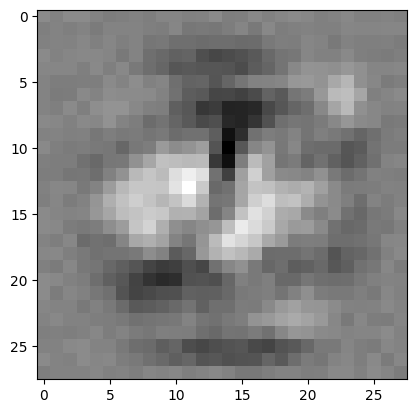

Época 107/150, Perda: 0.278317, Acurácia: 0.9229
weights: torch.Size([10, 784])


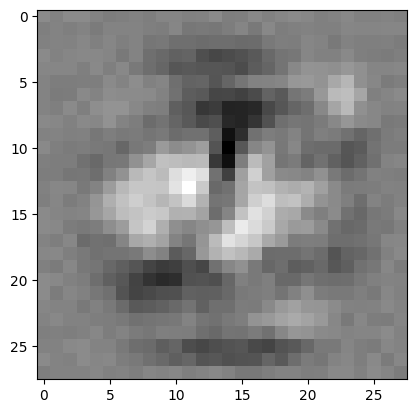

Época 108/150, Perda: 0.278314, Acurácia: 0.9229
weights: torch.Size([10, 784])


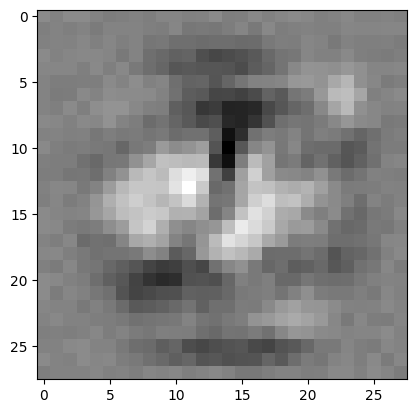

Época 109/150, Perda: 0.278310, Acurácia: 0.9229
weights: torch.Size([10, 784])


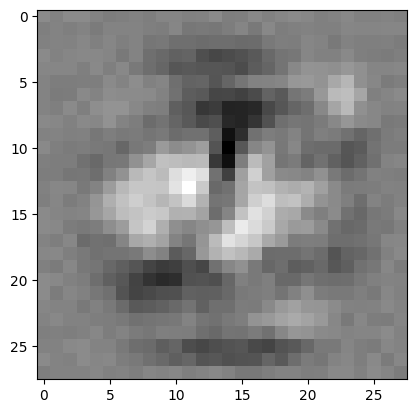

Época 110/150, Perda: 0.278307, Acurácia: 0.9229
weights: torch.Size([10, 784])


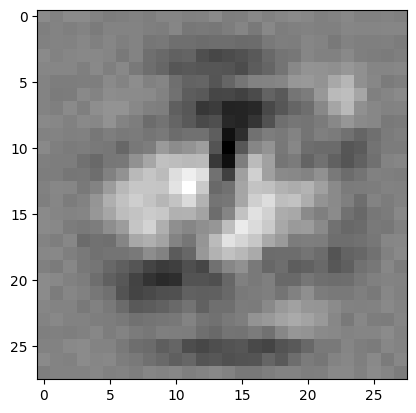

Época 111/150, Perda: 0.278303, Acurácia: 0.9229
weights: torch.Size([10, 784])


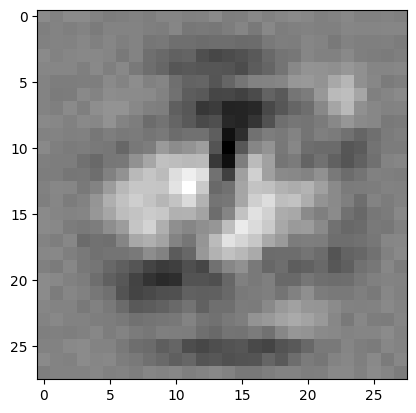

Época 112/150, Perda: 0.278300, Acurácia: 0.9229
weights: torch.Size([10, 784])


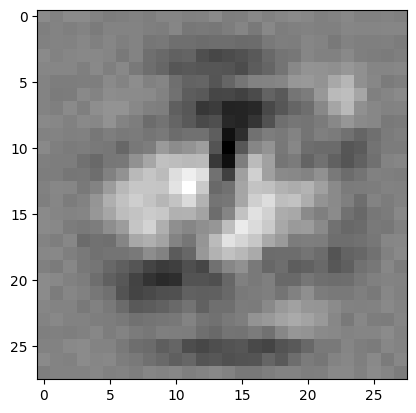

Época 113/150, Perda: 0.278296, Acurácia: 0.9229
weights: torch.Size([10, 784])


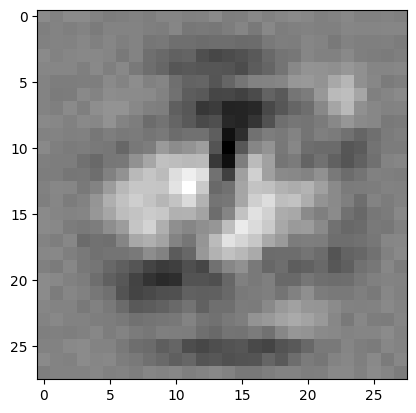

Época 114/150, Perda: 0.278293, Acurácia: 0.9229
weights: torch.Size([10, 784])


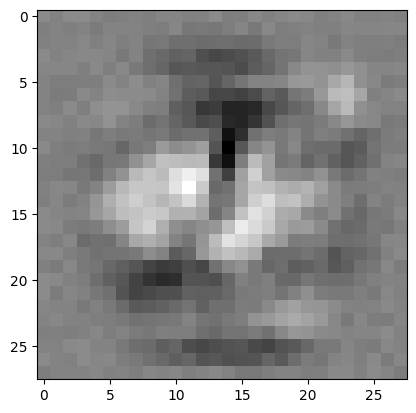

Época 115/150, Perda: 0.278289, Acurácia: 0.9229
weights: torch.Size([10, 784])


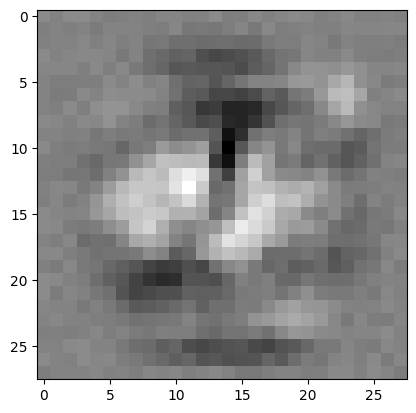

Época 116/150, Perda: 0.278286, Acurácia: 0.9229
weights: torch.Size([10, 784])


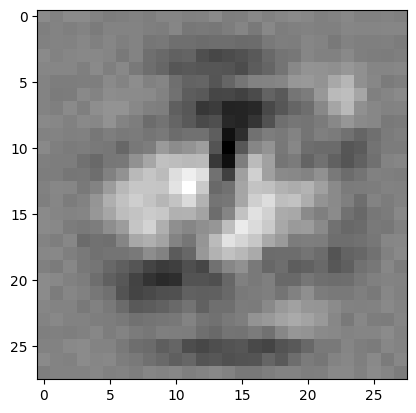

Época 117/150, Perda: 0.278282, Acurácia: 0.9229
weights: torch.Size([10, 784])


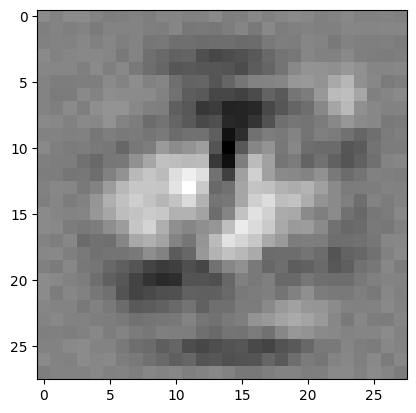

Época 118/150, Perda: 0.278279, Acurácia: 0.9229
weights: torch.Size([10, 784])


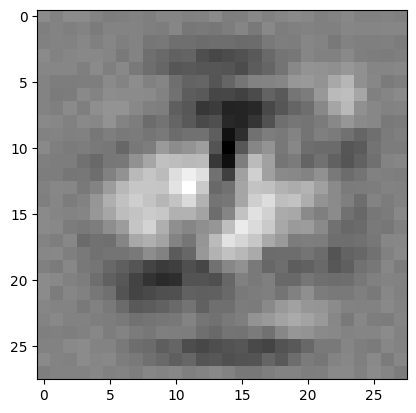

Época 119/150, Perda: 0.278275, Acurácia: 0.9229
weights: torch.Size([10, 784])


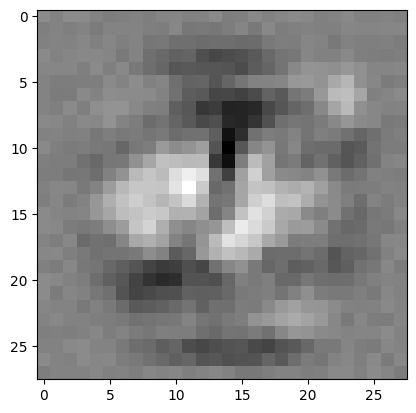

Época 120/150, Perda: 0.278272, Acurácia: 0.9229
weights: torch.Size([10, 784])


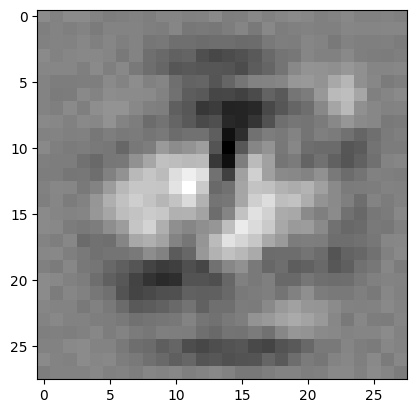

Época 121/150, Perda: 0.278268, Acurácia: 0.9229
weights: torch.Size([10, 784])


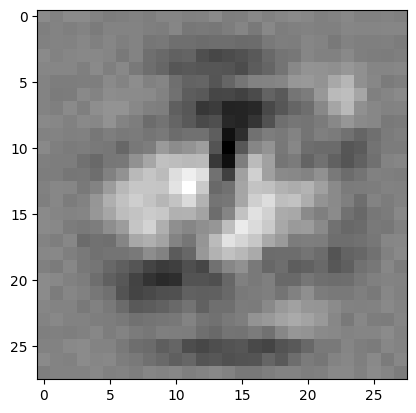

Época 122/150, Perda: 0.278265, Acurácia: 0.9229
weights: torch.Size([10, 784])


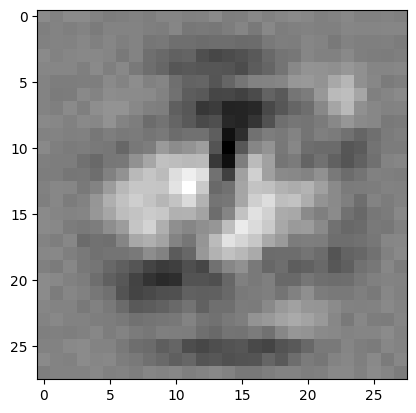

Época 123/150, Perda: 0.278262, Acurácia: 0.9229
weights: torch.Size([10, 784])


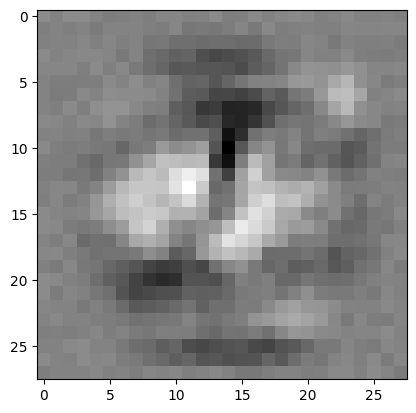

Época 124/150, Perda: 0.278258, Acurácia: 0.9229
weights: torch.Size([10, 784])


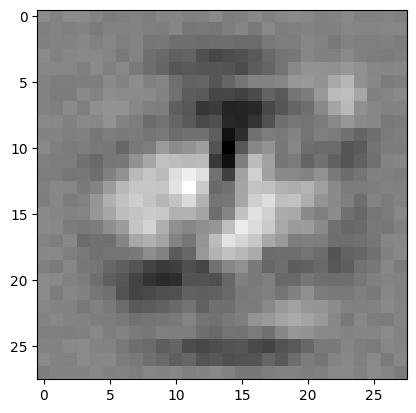

Época 125/150, Perda: 0.278255, Acurácia: 0.9229
weights: torch.Size([10, 784])


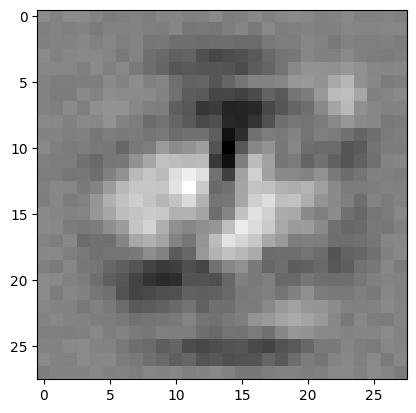

Época 126/150, Perda: 0.278251, Acurácia: 0.9229
weights: torch.Size([10, 784])


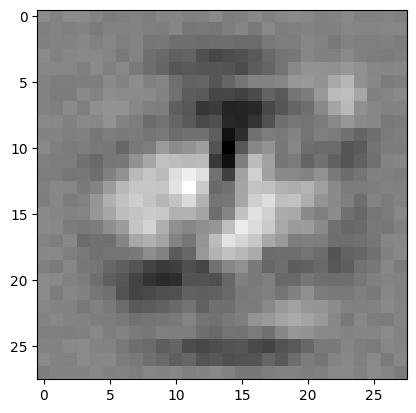

Época 127/150, Perda: 0.278248, Acurácia: 0.9229
weights: torch.Size([10, 784])


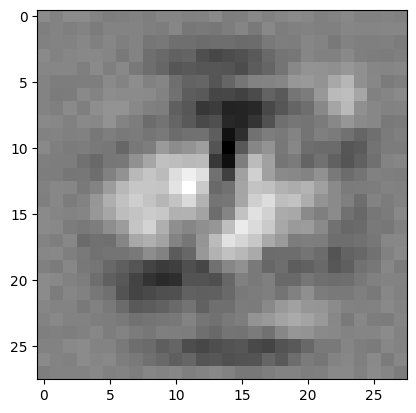

Época 128/150, Perda: 0.278244, Acurácia: 0.9229
weights: torch.Size([10, 784])


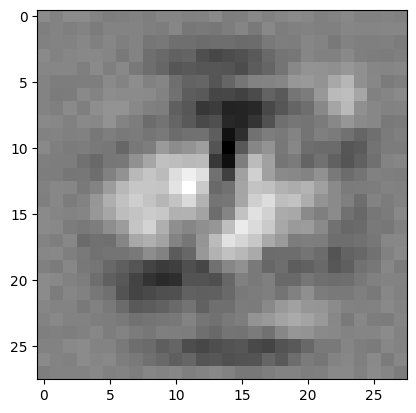

Época 129/150, Perda: 0.278241, Acurácia: 0.9229
weights: torch.Size([10, 784])


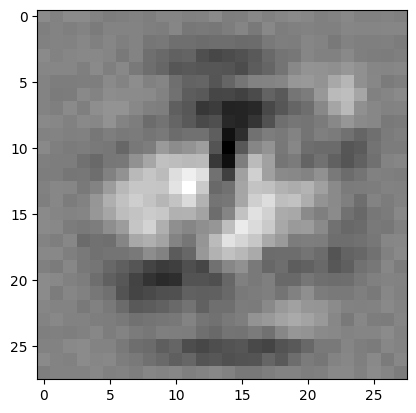

Época 130/150, Perda: 0.278237, Acurácia: 0.9229
weights: torch.Size([10, 784])


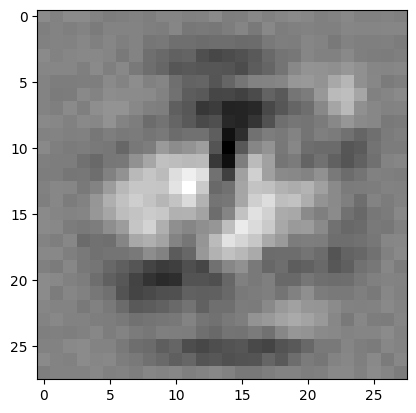

Época 131/150, Perda: 0.278234, Acurácia: 0.9229
weights: torch.Size([10, 784])


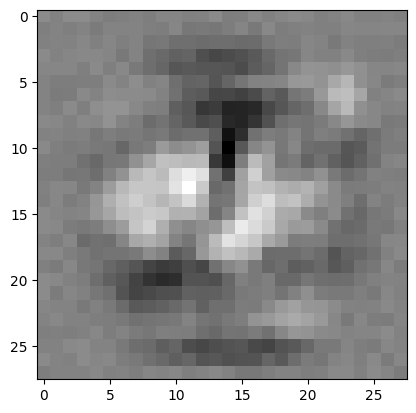

Época 132/150, Perda: 0.278230, Acurácia: 0.9229
weights: torch.Size([10, 784])


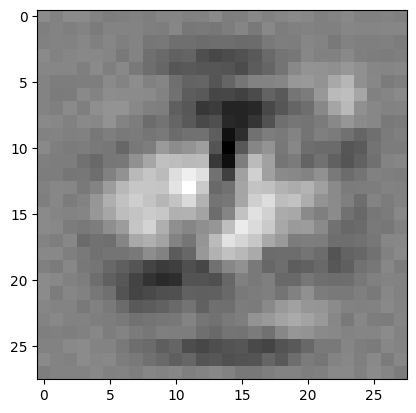

Época 133/150, Perda: 0.278227, Acurácia: 0.9229
weights: torch.Size([10, 784])


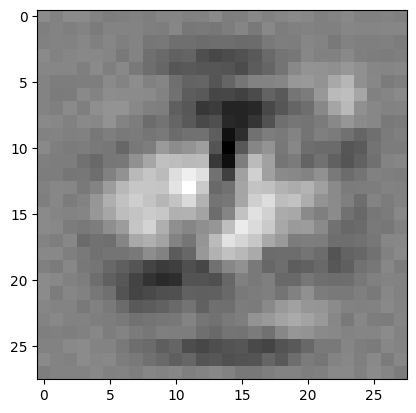

Época 134/150, Perda: 0.278224, Acurácia: 0.9229
weights: torch.Size([10, 784])


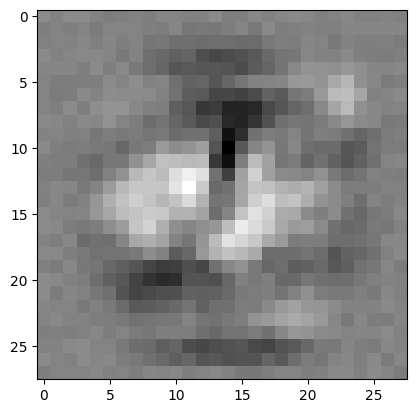

Época 135/150, Perda: 0.278220, Acurácia: 0.9229
weights: torch.Size([10, 784])


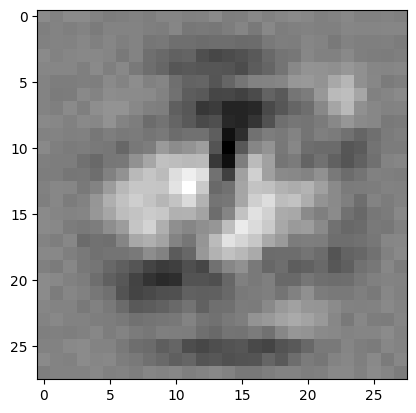

Época 136/150, Perda: 0.278217, Acurácia: 0.9229
weights: torch.Size([10, 784])


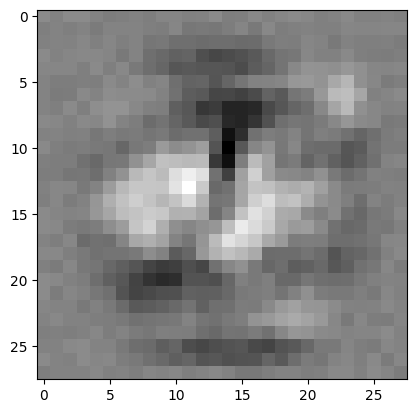

Época 137/150, Perda: 0.278213, Acurácia: 0.9229
weights: torch.Size([10, 784])


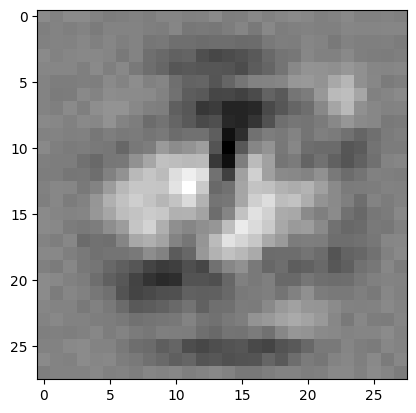

Época 138/150, Perda: 0.278210, Acurácia: 0.9229
weights: torch.Size([10, 784])


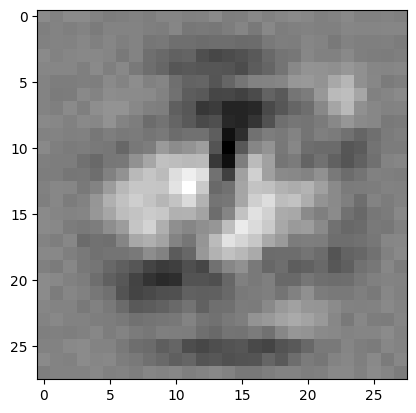

Época 139/150, Perda: 0.278206, Acurácia: 0.9229
weights: torch.Size([10, 784])


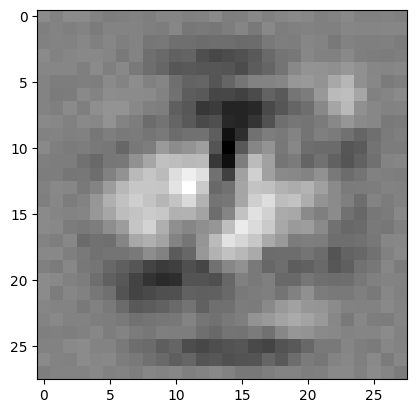

Época 140/150, Perda: 0.278203, Acurácia: 0.9229
weights: torch.Size([10, 784])


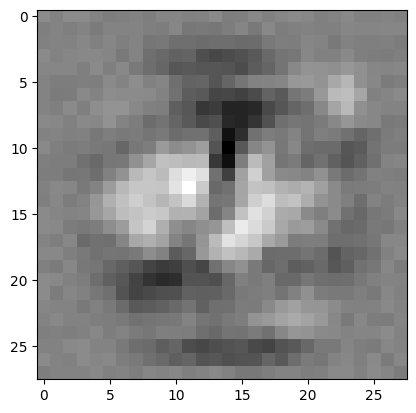

Época 141/150, Perda: 0.278199, Acurácia: 0.9229
weights: torch.Size([10, 784])


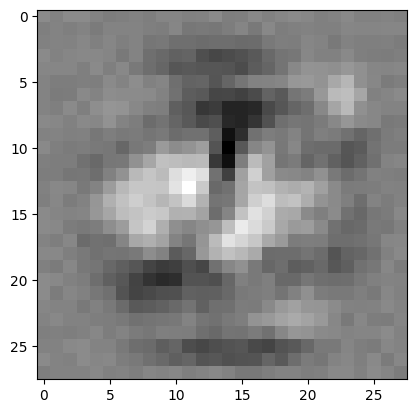

Época 142/150, Perda: 0.278196, Acurácia: 0.9229
weights: torch.Size([10, 784])


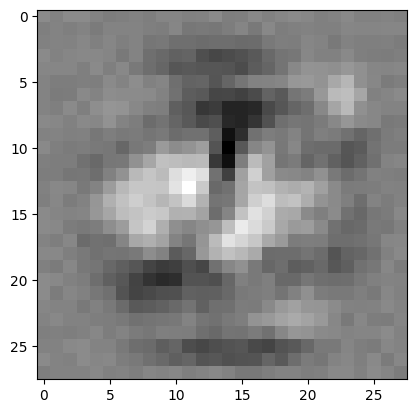

Época 143/150, Perda: 0.278193, Acurácia: 0.9229
weights: torch.Size([10, 784])


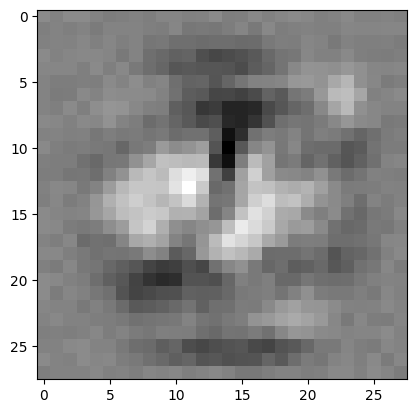

Época 144/150, Perda: 0.278189, Acurácia: 0.9229
weights: torch.Size([10, 784])


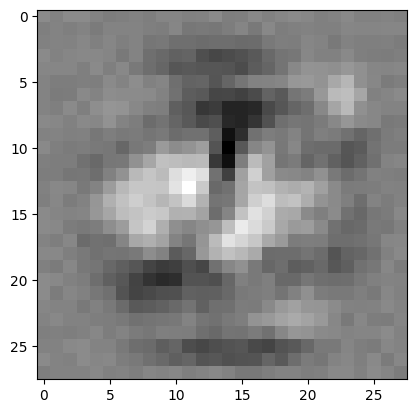

Época 145/150, Perda: 0.278186, Acurácia: 0.9229
weights: torch.Size([10, 784])


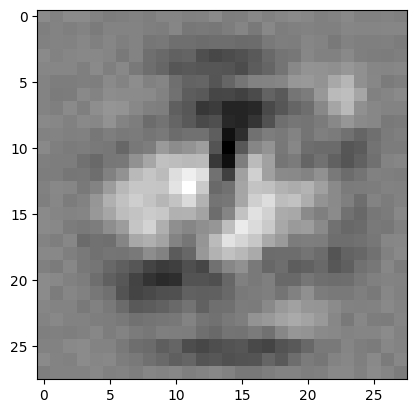

Época 146/150, Perda: 0.278182, Acurácia: 0.9229
weights: torch.Size([10, 784])


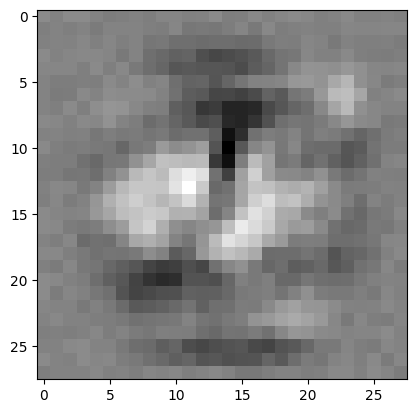

Época 147/150, Perda: 0.278179, Acurácia: 0.9229
weights: torch.Size([10, 784])


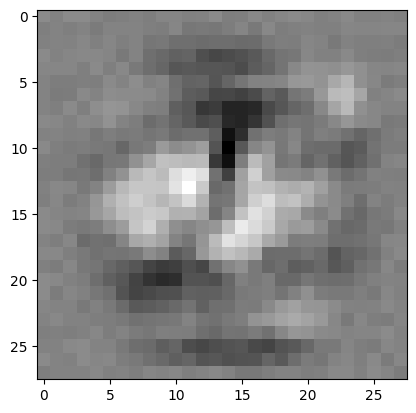

Época 148/150, Perda: 0.278175, Acurácia: 0.9229
weights: torch.Size([10, 784])


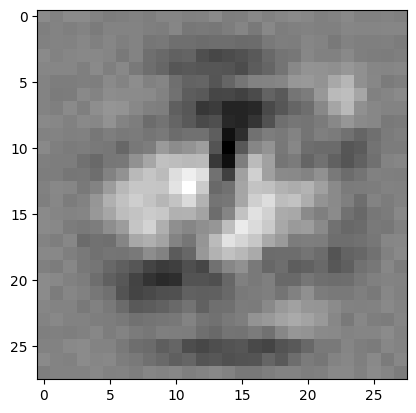

Época 149/150, Perda: 0.278172, Acurácia: 0.9229
weights: torch.Size([10, 784])


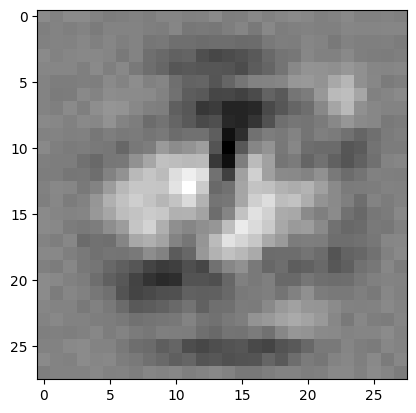

Época 150/150, Perda: 0.278168, Acurácia: 0.9229
weights: torch.Size([10, 784])


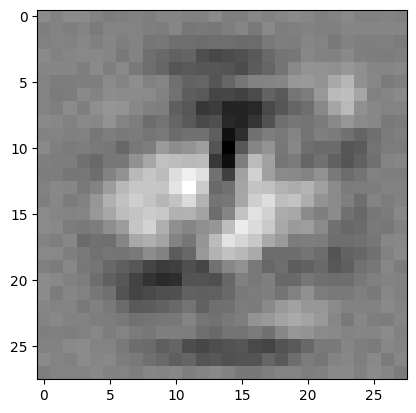

In [60]:
epochs = 150
learningRate = 0.09

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))  # O view() transforma as imagens, que são uma matriz, em um array de uma linha (784 colunas)

    # Predict da rede
    outputs = model(inputs)

    # Salvar os valores de z (saída da rede antes do softmax)
    zs.append(outputs[1].detach().numpy())

    # Calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # Zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Salvar a perda
    losses.append(loss.item())

    # Previsões e cálculo da acurácia
    _, predicts = torch.max(outputs, 1)  # Pega a classe com maior probabilidade
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()  # Acurácia

    # Imprimir os resultados da época
    print(f"Época {i + 1}/{epochs}, Perda: {loss.item():.6f}, Acurácia: {accuracy:.4f}")

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    # Visualizando pesos da classe 4
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray') # O reshape restaura as imagens, que tinham sido transformadas em um array, para uma matriz novamente
    plt.show()


<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede? **R - [60000, 28*28]**

2. Qual é o shape da saída da rede? **R - [60000, 10]**
3. Qual é o número total de parâmetros da rede, incluindo o bias? **R - 28 * 28 + 10 = 794**

# Aprendizados
